In [38]:
import random

# Set the global seed
_GLOBAL_SEED = 42
random.seed(_GLOBAL_SEED)


In [39]:
import pandas as pd
import numpy as np

# Load the training dataset
generic_disorder_df = pd.read_csv('../_Dataset/genetic_disorder_dataset.csv')

In [40]:
generic_disorder_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

Delete the unimportant collumns

In [41]:
columns_to_remove = ['Patient Id', 'Patient First Name', 'Family Name', "Father's name", 'Institute Name', 
                     'Location of Institute', 'Parental consent', 'Follow-up', 'Status']
generic_disorder_df = generic_disorder_df.drop(columns=columns_to_remove)

In [42]:
generic_disorder_df.rename(columns={"Patient Age":"patient_age",
                    "Genes in mother's side":"mother_side_genes",
                    'Inherited from father':"father_side_genes",
                    'Maternal gene':"maternal_gene",
                    'Paternal gene':"paternal_gene",
                    "Blood cell count (mcL)":"blood_cell_count",
                    "Mother's age":"mother_age",
                    "Father's age":"father_age",
                    "Respiratory Rate (breaths/min)":"respiratory_rate",
                    "Heart Rate (rates/min":"heart_rate",
                    'Gender': 'gender',
                    "Birth asphyxia":"birth_asphyxia",
                    "Autopsy shows birth defect (if applicable)":"authopsy_birth_defect",
                    "Place of birth":"place_of_birth",
                    "Folic acid details (peri-conceptional)":"follic_acid",
                    "H/O serious maternal illness":"maternal_illness",
                    "H/O radiation exposure (x-ray)":"radiation_exposure",
                    "H/O substance abuse":"substance_abuse",
                    "Assisted conception IVF/ART":"assist_conception",
                    "History of anomalies in previous pregnancies":"previous_pregnancies_anomalies",
                    "No. of previous abortion":"previous_abortion",
                    "Birth defects":"birth_defects",
                    "White Blood cell count (thousand per microliter)":"white_blood_cell_count",
                    "Blood test result":"blood_test_result",
                    "Genetic Disorder":"genetic_disorder",
                    "Disorder Subclass":"disorder_subclass",
                    'Test 1':'test_1',
                    'Test 2':'test_2',
                    'Test 3':'test_3',
                    'Test 4':'test_4',
                    'Test 5':'test_5',
                    'Symptom 1':'symptom_1',
                    'Symptom 2':'symptom_2',
                    'Symptom 3':'symptom_3',
                    'Symptom 4':'symptom_4',
                    'Symptom 5':'symptom_5'
                    },inplace=True)

In [43]:
generic_disorder_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_age                     20656 non-null  float64
 1   mother_side_genes               22083 non-null  object 
 2   father_side_genes               21777 non-null  object 
 3   maternal_gene                   19273 non-null  object 
 4   paternal_gene                   22083 non-null  object 
 5   blood_cell_count                22083 non-null  float64
 6   mother_age                      16047 non-null  float64
 7   father_age                      16097 non-null  float64
 8   respiratory_rate                19934 non-null  object 
 9   heart_rate                      19970 non-null  object 
 10  test_1                          19956 non-null  float64
 11  test_2                          19931 non-null  float64
 12  test_3                          

Replace the NaN data

In [44]:
generic_disorder_df["birth_asphyxia"] = generic_disorder_df["birth_asphyxia"].replace("No record", np.NaN)
generic_disorder_df["birth_asphyxia"] = generic_disorder_df["birth_asphyxia"].replace("Not available", np.NaN)

generic_disorder_df["authopsy_birth_defect"] = generic_disorder_df["authopsy_birth_defect"].replace("None",np.NaN)
generic_disorder_df["authopsy_birth_defect"] = generic_disorder_df["authopsy_birth_defect"].replace("Not applicable",np.NaN)

generic_disorder_df["radiation_exposure"] = generic_disorder_df["radiation_exposure"].replace("Not applicable",np.NaN)
generic_disorder_df["radiation_exposure"] = generic_disorder_df["radiation_exposure"].replace("-",np.NaN)

generic_disorder_df["substance_abuse"] = generic_disorder_df["substance_abuse"].replace("Not applicable",np.NaN)
generic_disorder_df["substance_abuse"] = generic_disorder_df["substance_abuse"].replace("-",np.NaN)

In [45]:
generic_disorder_df.dropna(subset=['disorder_subclass', 'genetic_disorder'], inplace=True)

In [46]:
generic_disorder_df.isna().sum()

patient_age                        1060
mother_side_genes                     0
father_side_genes                   220
maternal_gene                      2071
paternal_gene                         0
blood_cell_count                      0
mother_age                         4457
father_age                         4418
respiratory_rate                   1570
heart_rate                         1528
test_1                             1573
test_2                             1588
test_3                             1569
test_4                             1574
test_5                             1596
gender                             1573
birth_asphyxia                     9784
authopsy_birth_defect             12623
place_of_birth                     1591
follic_acid                        1564
maternal_illness                   1552
radiation_exposure                 9774
substance_abuse                    9752
assist_conception                  1590
previous_pregnancies_anomalies     1614


In [47]:
generic_disorder_df["father_side_genes"].fillna(generic_disorder_df["father_side_genes"].mode()[0], inplace=True)
generic_disorder_df["maternal_gene"].fillna(generic_disorder_df["maternal_gene"].mode()[0], inplace=True)
generic_disorder_df["respiratory_rate"].fillna(generic_disorder_df["respiratory_rate"].mode()[0], inplace=True)
generic_disorder_df["heart_rate"].fillna(generic_disorder_df["heart_rate"].mode()[0], inplace=True)
generic_disorder_df["gender"].fillna(generic_disorder_df["gender"].mode()[0], inplace=True)
generic_disorder_df["birth_asphyxia"].fillna(generic_disorder_df["birth_asphyxia"].mode()[0], inplace=True)
generic_disorder_df["authopsy_birth_defect"].fillna(generic_disorder_df["authopsy_birth_defect"].mode()[0], inplace=True)
generic_disorder_df["place_of_birth"].fillna(generic_disorder_df["place_of_birth"].mode()[0], inplace=True)
generic_disorder_df["follic_acid"].fillna(generic_disorder_df["follic_acid"].mode()[0], inplace=True)
generic_disorder_df["maternal_illness"].fillna(generic_disorder_df["maternal_illness"].mode()[0], inplace=True)
generic_disorder_df["radiation_exposure"].fillna(generic_disorder_df["radiation_exposure"].mode()[0], inplace=True)
generic_disorder_df["substance_abuse"].fillna(generic_disorder_df["substance_abuse"].mode()[0], inplace=True)
generic_disorder_df["assist_conception"].fillna(generic_disorder_df["assist_conception"].mode()[0], inplace=True)
generic_disorder_df["previous_pregnancies_anomalies"].fillna(generic_disorder_df["previous_pregnancies_anomalies"].mode()[0], inplace=True)
generic_disorder_df["birth_defects"].fillna(generic_disorder_df["birth_defects"].mode()[0], inplace=True)
generic_disorder_df["blood_test_result"].fillna(generic_disorder_df["blood_test_result"].mode()[0], inplace=True)
generic_disorder_df["test_1"].fillna(generic_disorder_df["test_1"].mode()[0], inplace=True)
generic_disorder_df["test_2"].fillna(generic_disorder_df["test_2"].mode()[0], inplace=True)
generic_disorder_df["test_3"].fillna(generic_disorder_df["test_3"].mode()[0], inplace=True)
generic_disorder_df["test_4"].fillna(generic_disorder_df["test_4"].mode()[0], inplace=True)
generic_disorder_df["test_5"].fillna(generic_disorder_df["test_5"].mode()[0], inplace=True)
generic_disorder_df["symptom_1"].fillna(generic_disorder_df["symptom_1"].mode()[0], inplace=True)
generic_disorder_df["symptom_2"].fillna(generic_disorder_df["symptom_2"].mode()[0], inplace=True)
generic_disorder_df["symptom_3"].fillna(generic_disorder_df["symptom_3"].mode()[0], inplace=True)
generic_disorder_df["symptom_4"].fillna(generic_disorder_df["symptom_4"].mode()[0], inplace=True)
generic_disorder_df["symptom_5"].fillna(generic_disorder_df["symptom_5"].mode()[0], inplace=True)

generic_disorder_df["patient_age"].fillna(generic_disorder_df.groupby(["disorder_subclass"])["patient_age"].transform("mean"),inplace=True)
generic_disorder_df["mother_age"].fillna(generic_disorder_df.groupby(["disorder_subclass"])["mother_age"].transform("mean"),inplace=True)
generic_disorder_df["father_age"].fillna(generic_disorder_df.groupby(["disorder_subclass"])["father_age"].transform("mean"),inplace=True)
generic_disorder_df["previous_abortion"].fillna(generic_disorder_df.groupby(["disorder_subclass"])["previous_abortion"].transform("mean"),inplace=True)
generic_disorder_df["white_blood_cell_count"].fillna(generic_disorder_df.groupby(["disorder_subclass"])["white_blood_cell_count"].transform("mean"),inplace=True)

In [48]:
generic_disorder_df.isna().sum()

patient_age                       0
mother_side_genes                 0
father_side_genes                 0
maternal_gene                     0
paternal_gene                     0
blood_cell_count                  0
mother_age                        0
father_age                        0
respiratory_rate                  0
heart_rate                        0
test_1                            0
test_2                            0
test_3                            0
test_4                            0
test_5                            0
gender                            0
birth_asphyxia                    0
authopsy_birth_defect             0
place_of_birth                    0
follic_acid                       0
maternal_illness                  0
radiation_exposure                0
substance_abuse                   0
assist_conception                 0
previous_pregnancies_anomalies    0
previous_abortion                 0
birth_defects                     0
white_blood_cell_count      

In [49]:
generic_disorder_df['genetic_disorder'].unique()

array(['Mitochondrial genetic inheritance disorders',
       'Multifactorial genetic inheritance disorders',
       'Single-gene inheritance diseases'], dtype=object)

In [50]:
generic_disorder_df['disorder_subclass'].unique()

array(["Leber's hereditary optic neuropathy", 'Diabetes',
       'Leigh syndrome', 'Cancer', 'Cystic fibrosis', 'Tay-Sachs',
       'Hemochromatosis', 'Mitochondrial myopathy', "Alzheimer's"],
      dtype=object)

Encode string data

In [51]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Encode string columns
string_columns = generic_disorder_df.select_dtypes(include=['object']).columns
generic_disorder_df[string_columns] = generic_disorder_df[string_columns].apply(encoder.fit_transform)

# Transform all the columns into float for normalization
generic_disorder_df = generic_disorder_df.astype('float32')

In [52]:
generic_disorder_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18047 entries, 0 to 22082
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_age                     18047 non-null  float32
 1   mother_side_genes               18047 non-null  float32
 2   father_side_genes               18047 non-null  float32
 3   maternal_gene                   18047 non-null  float32
 4   paternal_gene                   18047 non-null  float32
 5   blood_cell_count                18047 non-null  float32
 6   mother_age                      18047 non-null  float32
 7   father_age                      18047 non-null  float32
 8   respiratory_rate                18047 non-null  float32
 9   heart_rate                      18047 non-null  float32
 10  test_1                          18047 non-null  float32
 11  test_2                          18047 non-null  float32
 12  test_3                          18047

In [53]:
generic_disorder_df

,patient_age,mother_side_genes,father_side_genes,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,respiratory_rate,heart_rate,...,birth_defects,white_blood_cell_count,blood_test_result,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,genetic_disorder,disorder_subclass
0,2.0,1.0,0.0,1.0,0.0,4.760603,34.886364,42.378319,0.0,0.0,...,0.0,9.857562,3.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0
2,6.0,1.0,0.0,0.0,0.0,4.893297,41.000000,22.000000,0.0,1.0,...,1.0,7.474796,2.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0
3,12.0,1.0,0.0,1.0,0.0,4.705280,21.000000,41.706436,1.0,0.0,...,1.0,7.919321,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0
4,11.0,1.0,0.0,1.0,1.0,4.720703,32.000000,40.742424,1.0,1.0,...,0.0,4.098210,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5,14.0,1.0,0.0,1.0,0.0,5.103189,34.601513,42.015587,0.0,0.0,...,0.0,10.272230,2.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22077,9.0,0.0,1.0,1.0,1.0,5.012599,47.000000,41.706436,0.0,0.0,...,0.0,12.000000,3.0,1.0,1.0,0.0,0.0,0.0,0.0,6.0
22078,4.0,1.0,1.0,1.0,0.0,5.258298,35.000000,64.000000,0.0,1.0,...,0.0,6.584811,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0
22079,8.0,0.0,1.0,0.0,1.0,4.974220,34.668789,56.000000,0.0,0.0,...,0.0,7.041556,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0
22080,8.0,1.0,0.0,1.0,0.0,5.186470,35.000000,51.000000,1.0,0.0,...,1.0,7.715465,2.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0


Genetic Disorder Class Distribution:
genetic_disorder
0.0    9241
2.0    6929
1.0    1877
Name: count, dtype: int64

Disorder Subclass Distribution:
disorder_subclass
6.0    4683
7.0    3971
2.0    3145
8.0    2556
3.0    1653
4.0    1228
5.0     587
0.0     133
1.0      91
Name: count, dtype: int64


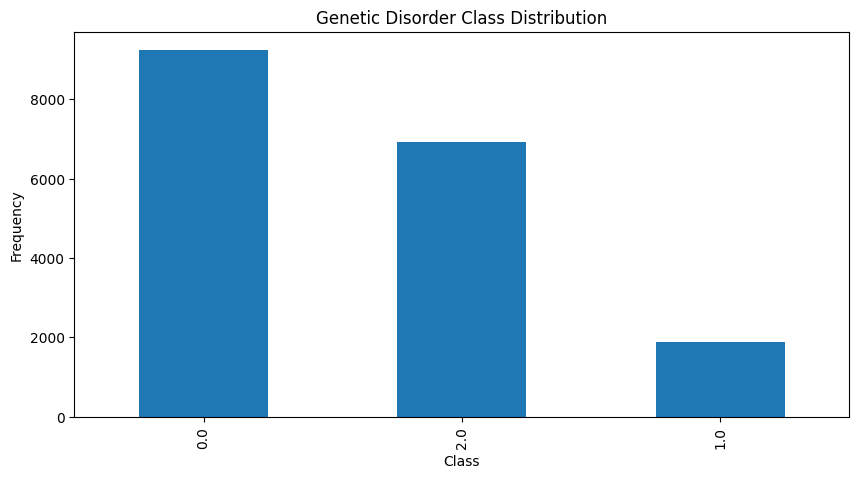

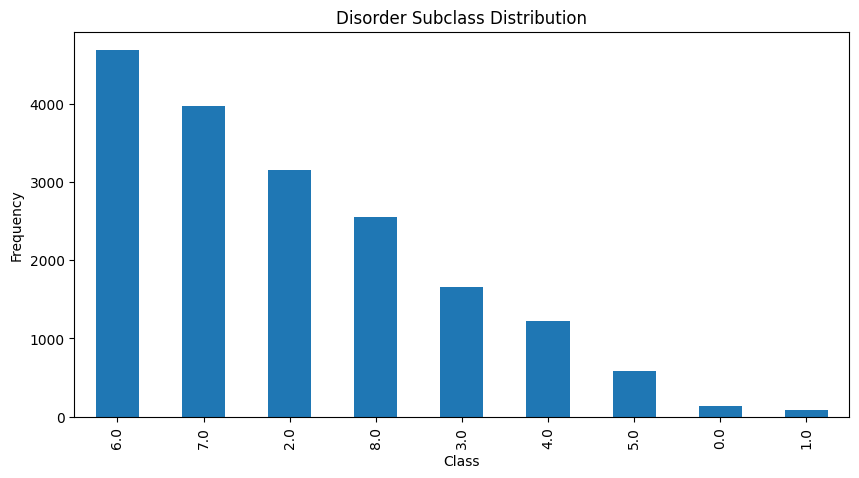

In [54]:
import matplotlib.pyplot as plt

genetic_disorder_distribution = generic_disorder_df['genetic_disorder'].value_counts()
disorder_subclass_distribution = generic_disorder_df['disorder_subclass'].value_counts()

print("Genetic Disorder Class Distribution:")
print(genetic_disorder_distribution)
print("\nDisorder Subclass Distribution:")
print(disorder_subclass_distribution)

# Plot Genetic Disorder Class Distribution
plt.figure(figsize=(10, 5))
genetic_disorder_distribution.plot(kind='bar')
plt.title('Genetic Disorder Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Plot Disorder Subclass Distribution
plt.figure(figsize=(10, 5))
disorder_subclass_distribution.plot(kind='bar')
plt.title('Disorder Subclass Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [55]:
# from sklearn.model_selection import train_test_split

# # Split the data into train and test sets
# train_df, test_df = train_test_split(generic_disorder_df, test_size=0.2, random_state=_GLOBAL_SEED)

# # Save the train and test sets as CSV files
# train_df.to_csv('../_Dataset/train_dataset.csv', index=False)
# test_df.to_csv('../_Dataset/test_dataset.csv', index=False)
